In [1]:
# importing preprocessed data

import pandas as pd

df = pd.read_csv('preprocessed_data.csv')
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,127.0,360.0,1.0,2,1
1,1,1,1,0,0,3806.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


### Feature Engineering


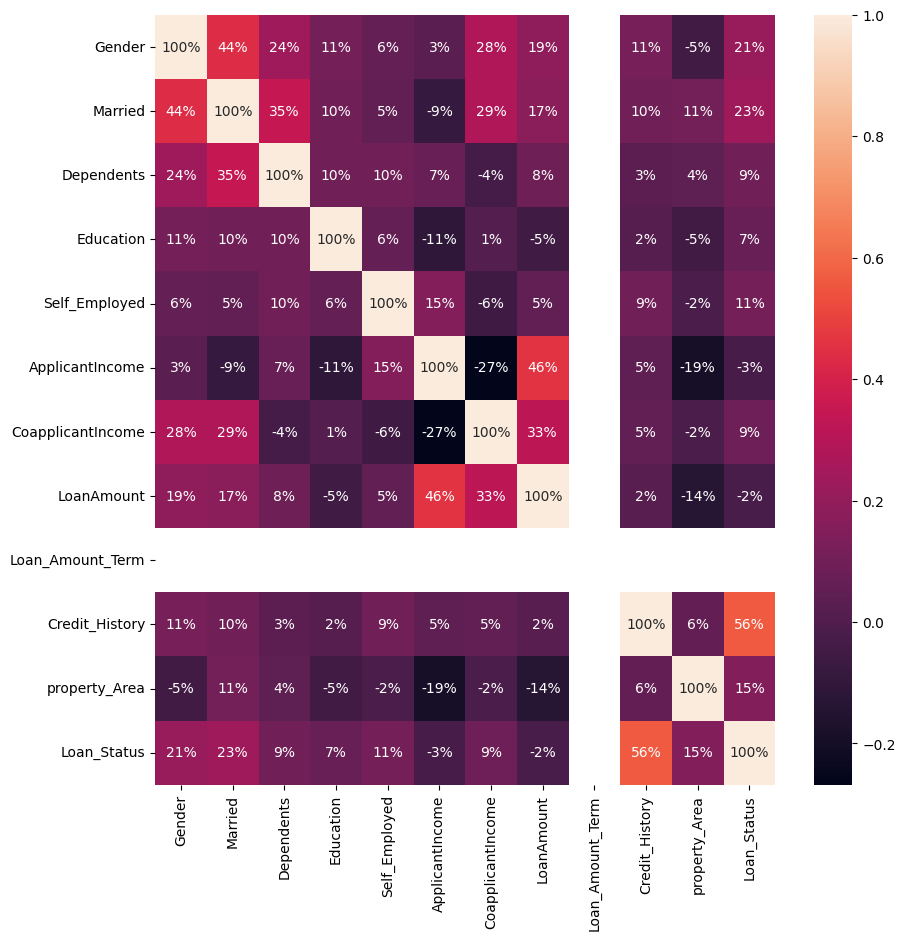

In [2]:
# checking for data corelation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()


In [9]:
# listing top 6 correlated features

correlated_features =  list(df.corr()['Loan_Status'].sort_values(ascending=False).head(7).keys())
print(correlated_features)


['Loan_Status', 'Credit_History', 'Married', 'Gender', 'property_Area', 'Self_Employed', 'Dependents']


In [10]:
# creating a new dataframe with top 6 correlated features, since we will train models with both correlated only and all features

df_correlated = df[correlated_features]
df_correlated.head()


,Loan_Status,Credit_History,Married,Gender,property_Area,Self_Employed,Dependents
0,1,1.0,0,1,2,0,0
1,0,1.0,1,1,0,0,1
2,1,1.0,1,1,2,1,0
3,1,1.0,1,1,2,0,0
4,1,1.0,0,1,2,0,0


In [11]:
# using SelectKBest to select top 6 features

from sklearn.feature_selection import SelectKBest

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

best_features = SelectKBest(k=6)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(6,'Score'))


             Specs       Score
9   Credit_History  288.524014
1          Married   35.282340
0           Gender   29.801325
10   property_Area   14.008857
4    Self_Employed    7.377699
2       Dependents    5.639549


/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


We can see that both correlation matrix and SelectKBest gave us the same result.   
We will use top 6 features only and all features, both for the training since sometimes the model can perform better with all features.


In [12]:
# splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_correlated = df_correlated.drop('Loan_Status', axis=1)
y_correlated = df_correlated['Loan_Status']

X_train_correlated, X_test_correlated, y_train_correlated, y_test_correlated = train_test_split(X_correlated, y_correlated, test_size=0.2, random_state=0)


## Model Selection

- We will try following models to predict loan eligibility:
    - Logistic Regression
    - Random Forest Classifier
    - Gradient Boosting Classifier
    - Support Vector Machines (SVM)
    - Artificial Neural Networks

Logistic Regression: This model can be used to classify customers into eligible and non-eligible categories based on their demographic and financial information. Logistic regression is a popular and efficient algorithm for binary classification problems like loan eligibility.

Random Forest Classifier: This is a tree-based ensemble algorithm that can handle both categorical and continuous data. It can be used to identify important features that determine loan eligibility and predict the outcome accurately.

Gradient Boosting Classifier: This is a powerful ensemble algorithm that can handle complex data sets and provides high accuracy. It can be used to predict the probability of loan eligibility based on the customer information provided.

Support Vector Machines (SVM): SVM is a popular machine learning algorithm used for classification problems. It can be used to build a model to predict loan eligibility by separating the eligible and non-eligible classes with a hyperplane.

Artificial Neural Networks: This is a deep learning algorithm that can handle large and complex datasets. It can be used to build a model to predict loan eligibility based on the customer data provided. Neural networks can learn complex patterns in the data and make accurate predictions.


In [17]:
# Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_correlated = LogisticRegression()
LR_correlated.fit(X_train_correlated, y_train_correlated)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Training random forest model

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

RF_correlated = RandomForestClassifier(n_estimators=100, random_state=0)
RF_correlated.fit(X_train_correlated, y_train_correlated)


RandomForestClassifier(random_state=0)

In [19]:
# Training Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB.fit(X_train, y_train)

GB_correlated = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB_correlated.fit(X_train_correlated, y_train_correlated)


GradientBoostingClassifier(random_state=0)

In [20]:
# Training Support Vector Machine model

from sklearn.svm import SVC

SVM = SVC(random_state=0)
SVM.fit(X_train, y_train)

SVM_correlated = SVC(random_state=0)
SVM_correlated.fit(X_train_correlated, y_train_correlated)


SVC(random_state=0)

In [22]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 19.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 23.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 16.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 k

In [23]:
# Training Artificial Neural Network model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ANN = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(1, activation='sigmoid')
])

ANN.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=100)

ANN_correlated = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=[len(X_train_correlated.keys())]),
    layers.Dense(1, activation='sigmoid')
])

ANN_correlated.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

ANN_correlated.fit(X_train_correlated, y_train_correlated, epochs=100)


2023-03-19 00:02:50.844555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 00:02:54.265236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 00:02:54.265265: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 00:03:01.099074: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

Epoch 1/100
16/16 [==============================] - 2s 2ms/step - loss: 130.0809 - accuracy: 0.5634
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 100.6380 - accuracy: 0.5936
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 69.8399 - accuracy: 0.5956
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 47.2416 - accuracy: 0.6117
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 29.3059 - accuracy: 0.5694
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 23.7032 - accuracy: 0.5513
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 20.5665 - accuracy: 0.5372
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 19.8202 - accuracy: 0.5594
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 18.0989 - accuracy: 0.5372
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 15.9112 - accuracy: 0.54

In [27]:
# Saving all models

import pickle

pickle.dump(LR, open('models/LR_model.pkl', 'wb'))
pickle.dump(LR_correlated, open('models/LR_correlated_model.pkl', 'wb'))

pickle.dump(RF, open('models/RF_model.pkl', 'wb'))
pickle.dump(RF_correlated, open('models/RF_correlated_model.pkl', 'wb'))

pickle.dump(GB, open('models/GB_model.pkl', 'wb'))
pickle.dump(GB_correlated, open('models/GB_correlated_model.pkl', 'wb'))

pickle.dump(SVM, open('models/SVM_model.pkl', 'wb'))
pickle.dump(SVM_correlated, open('models/SVM_correlated_model.pkl', 'wb'))

pickle.dump(ANN, open('models/ANN_model.pkl', 'wb'))
pickle.dump(ANN_correlated, open('models/ANN_correlated_model.pkl', 'wb'))


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-19 00:05:33         1400
variables.h5                                   2023-03-19 00:05:33        21392
metadata.json                                  2023-03-19 00:05:33           64
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......